In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/zb-da9-competition/Special_Sale_Calendar.csv
/kaggle/input/zb-da9-competition/ConsumerElectronics.csv
/kaggle/input/zb-da9-competition/NPS_Stockindex.csv
/kaggle/input/zb-da9-competition/Media Investment.csv


In [3]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
df1 = pd.read_csv('/kaggle/input/zb-da9-competition/Special_Sale_Calendar.csv') #마케팅 프로모션 기간 정보 (2015/2016 일-월 기간정보)
df2 = pd.read_csv('/kaggle/input/zb-da9-competition/ConsumerElectronics.csv') #거래이력 데이터_메인
df3 = pd.read_csv('/kaggle/input/zb-da9-competition/NPS_Stockindex.csv')  # NPS(고객충성도 지표), Stock Index(주가 지수) 정보 (15.07~16.06 /1년간)
df4 = pd.read_csv('/kaggle/input/zb-da9-competition/Media Investment.csv') #광고 및 투자 내역 (년/월/총투자액/매체별 투자액)

# 문제상황

In [4]:
df3

,index,July'15,Aug'15,Sept'15,Oct'15,Nov'15,Dec'15,Jan'16,Feb'16,Mar'16,Apr'16,May'16,June'16
0,NPS,54.6,60.0,46.9,44.4,47.0,45.8,47.1,50.3,49.0,51.8,47.3,50.5
1,Stock Index,1177.0,1206.0,1101.0,1210.0,1233.0,1038.0,1052.0,1222.0,1015.0,1242.0,1228.0,1194.0


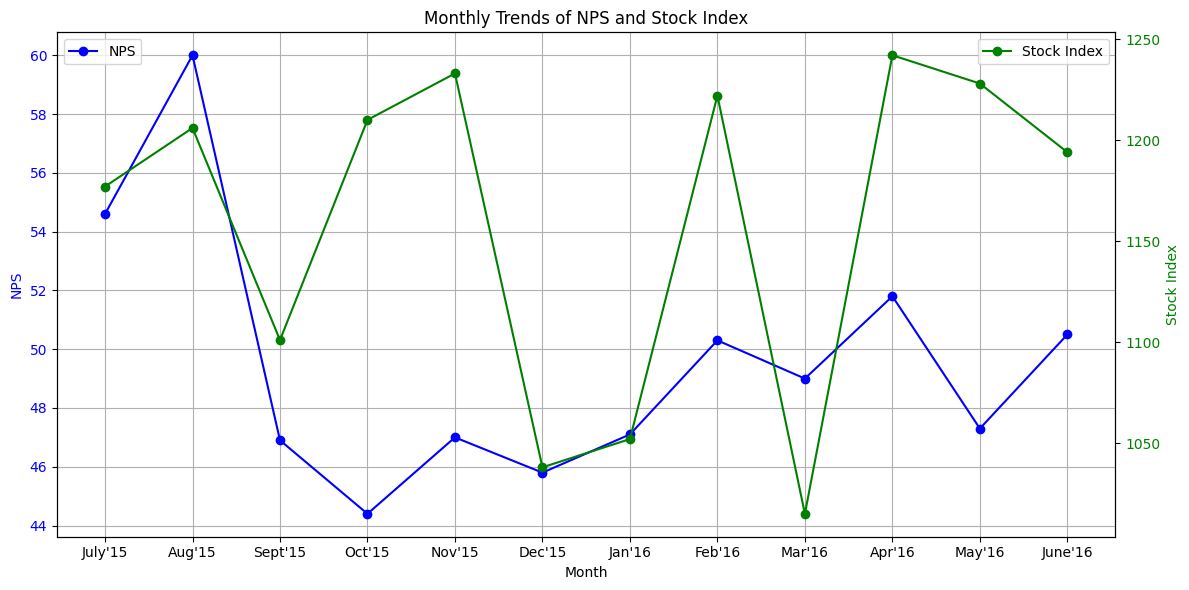

In [5]:
import matplotlib.pyplot as plt

df3.set_index('index', inplace=True)
df3_transposed = df3.T

fig, ax1 = plt.subplots(figsize=(12, 6))

# NPS(고객충성도) - 파랑
ax1.plot(df3_transposed.index, df3_transposed['NPS'], marker='o', label='NPS', color='blue')
ax1.set_xlabel('Month')
ax1.set_ylabel('NPS', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.grid()

# Stock Index(주가 지수) - 초록
ax2 = ax1.twinx()
ax2.plot(df3_transposed.index, df3_transposed['Stock Index'], marker='o', label='Stock Index', color='green')
ax2.set_ylabel('Stock Index', color='green')
ax2.tick_params(axis='y', labelcolor='green')

ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.title('Monthly Trends of NPS and Stock Index')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

* NPS(순 고객 추천 지수) = 추천고객비율 - 비추천고객비율
> 응답자들에게 친구나 동료에게 회사, 제품 또는 서비스를 추천할 가능성을 평가하는 지표
> 해당 데이터에서는 다른 사람에게 추천할 수 있을 만큼 해당 기업에 대한 만족도가 크고, 그만큼 충성도가 높다는 것을 의미

* 15년 8월 이후로 고객 충성도 지표가 크게 하락하였다. 약간의 회복 추세를 보이고 있으나 여전히 증감을 반복하며 불안정한 지표를 보이고 있다. 이커머스 사업의 안정적인 성장을 위해 고객 충성도 향상을 위한 데이터 분석을 진행한다.

# 데이터 전처리

In [ ]:
df2.tail(30)

In [12]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1648824 entries, 0 to 1648823
Data columns (total 20 columns):
 #   Column                           Non-Null Count    Dtype  
---  ------                           --------------    -----  
 0   fsn_id                           1648824 non-null  object 
 1   order_date                       1648824 non-null  object 
 2   Year                             1648824 non-null  int64  
 3   Month                            1648824 non-null  int64  
 4   order_id                         1648824 non-null  float64
 5   order_item_id                    1648824 non-null  float64
 6   gmv                              1648824 non-null  float64
 7   units                            1648824 non-null  int64  
 8   deliverybdays                    1648824 non-null  int64  
 9   deliverycdays                    1648824 non-null  int64  
 10  s1_fact.order_payment_type       1648824 non-null  object 
 11  sla                              1648824 non-null 

In [6]:
df2.isnull().sum()

fsn_id                             0
order_date                         0
Year                               0
Month                              0
order_id                           0
order_item_id                      0
gmv                                0
units                              0
deliverybdays                      0
deliverycdays                      0
s1_fact.order_payment_type         0
sla                                0
cust_id                            0
pincode                            0
product_analytic_super_category    0
product_analytic_category          0
product_analytic_sub_category      0
product_analytic_vertical          0
product_mrp                        0
product_procurement_sla            0
dtype: int64

In [ ]:
pd.options.display.float_format = '{:.2f}'.format
df2. describe()

* product_procurement_sla (제품 조달 소요시간) min값 -1 : 이상치라 판단

In [ ]:
df2[df2['product_procurement_sla'] == -1]

* product_procurement_sla 값이 -1인 행 75,986개
* -1 > 0으로 변환

In [5]:
df2['product_procurement_sla'] = df2['product_procurement_sla'].replace(-1, 0)

In [ ]:
df2.describe(include='object')

**문자열 -> 숫자열로 변환이 필요한 열**
* gmv (상품의 총판매가치)
* deliverybdays (주문일-최종 배송일 사이 영업일 수)
* deliverycdays (주문일-최종 배송일 사이 달력 일 수)

In [6]:
df2['gmv'] = pd.to_numeric(df2['gmv'], errors='coerce').fillna(0).astype(float)
df2['deliverybdays'] = pd.to_numeric(df2['deliverybdays'], errors='coerce').fillna(0).astype(int)
df2['deliverycdays'] = pd.to_numeric(df2['deliverycdays'], errors='coerce').fillna(0).astype(int)
df2.describe()

,Year,Month,order_id,order_item_id,gmv,units,deliverybdays,deliverycdays,sla,product_mrp,product_procurement_sla
count,1.648824e+06,1.648824e+06,1.648824e+06,1.648824e+06,1.648824e+06,1.648824e+06,1.648824e+06,1.648824e+06,1.648824e+06,1.648824e+06,1.648824e+06
mean,2.015519e+03,6.585650e+00,2.842445e+15,1.375628e+16,2.453804e+03,1.022087e+00,9.319630e-01,1.069039e+00,5.687832e+00,4.108309e+03,5.449536e+00
std,4.996557e-01,3.623351e+00,1.269134e+15,5.594598e+16,5.612081e+03,2.535318e-01,2.392968e+00,6.033582e+00,2.983336e+00,8.510918e+03,5.346107e+01
min,2.015000e+03,1.000000e+00,7.633152e+07,1.080165e+08,0.000000e+00,1.000000e+00,-9.800000e+01,-5.345000e+03,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.015000e+03,3.000000e+00,1.602589e+15,1.606725e+15,3.390000e+02,1.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00,7.990000e+02,1.000000e+00
50%,2.016000e+03,6.000000e+00,2.611825e+15,2.619185e+15,7.490000e+02,1.000000e+00,0.000000e+00,0.000000e+00,6.000000e+00,1.599000e+03,2.000000e+00
75%,2.016000e+03,1.000000e+01,3.610614e+15,4.397706e+15,1.999000e+03,1.000000e+00,0.000000e+00,0.000000e+00,7.000000e+00,3.499000e+03,3.000000e+00
max,2.016000e+03,1.200000e+01,5.395077e+15,3.000373e+17,2.269470e+05,5.000000e+01,2.380000e+02,2.780000e+02,1.006000e+03,2.999990e+05,1.000000e+03


* 배송일 관련 컬럼 (deliverybdays / deliverycdays)에서 -값 존재 : 이상치라 판단

In [9]:
#df2[df2['deliverybdays'] < 0].count()
df2[df2['deliverycdays'] < 0].count()

fsn_id                             39
order_date                         39
Year                               39
Month                              39
order_id                           39
order_item_id                      39
gmv                                39
units                              39
deliverybdays                      39
deliverycdays                      39
s1_fact.order_payment_type         39
sla                                39
cust_id                            39
pincode                            39
product_analytic_super_category    39
product_analytic_category          39
product_analytic_sub_category      39
product_analytic_vertical          39
product_mrp                        39
product_procurement_sla            39
dtype: int64

* 총 39개 행 : drop

In [7]:
df = df2[df2['deliverycdays'] >= 0]
df.describe(include='all')

,fsn_id,order_date,Year,Month,order_id,order_item_id,gmv,units,deliverybdays,deliverycdays,s1_fact.order_payment_type,sla,cust_id,pincode,product_analytic_super_category,product_analytic_category,product_analytic_sub_category,product_analytic_vertical,product_mrp,product_procurement_sla
count,1648785,1648785,1.648785e+06,1.648785e+06,1.648785e+06,1.648785e+06,1.648785e+06,1.648785e+06,1.648785e+06,1.648785e+06,1648785,1.648785e+06,1648785,1.648785e+06,1648785,1648785,1648785,1648785,1.648785e+06,1.648785e+06
unique,21219,1155163,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,1253475,1.297300e+04,1,5,14,74,NaN,NaN
top,ACCE6VGHYKYFX4WB,2016-04-27 00:19:27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,COD,NaN,,-9.031043e+18,CE,EntertainmentSmall,Speaker,LaptopSpeaker,NaN,NaN
freq,37622,294,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1191422,NaN,4904,7.743000e+03,1648785,944673,543914,287846,NaN,NaN
mean,NaN,NaN,2.015519e+03,6.585689e+00,2.842438e+15,1.375617e+16,2.453795e+03,1.022085e+00,9.333224e-01,1.087024e+00,NaN,5.687832e+00,NaN,NaN,NaN,NaN,NaN,NaN,4.108304e+03,5.449603e+00
std,NaN,NaN,4.996562e-01,3.623383e+00,1.269136e+15,5.594573e+16,5.612068e+03,2.535147e-01,2.373816e+00,2.764093e+00,NaN,2.983283e+00,NaN,NaN,NaN,NaN,NaN,NaN,8.510921e+03,5.346170e+01
min,NaN,NaN,2.015000e+03,1.000000e+00,7.633152e+07,1.080165e+08,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,0.000000e+00
25%,NaN,NaN,2.015000e+03,3.000000e+00,1.602586e+15,1.606721e+15,3.390000e+02,1.000000e+00,0.000000e+00,0.000000e+00,NaN,4.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,7.990000e+02,1.000000e+00
50%,NaN,NaN,2.016000e+03,6.000000e+00,2.611823e+15,2.619181e+15,7.490000e+02,1.000000e+00,0.000000e+00,0.000000e+00,NaN,6.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,1.599000e+03,2.000000e+00
75%,NaN,NaN,2.016000e+03,1.000000e+01,3.610610e+15,4.397706e+15,1.999000e+03,1.000000e+00,0.000000e+00,0.000000e+00,NaN,7.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,3.499000e+03,3.000000e+00


* product_procurement_sla (제품 조달 소요시간) -1값 > 0으로 변환
* gmv (상품의 총판매가치) : 문자열 > 숫자열로 변경
* deliverybdays (주문일-최종 배송일 사이 영업일 수) : 문자열 > 숫자열로 변경
* deliverycdays (주문일-최종 배송일 사이 달력 일 수) : 문자열 > 숫자열로 변경
* deliverybdays, deliverycdays : -값인 행 삭제 (39행)
______________
1,648,785행* 20열

프로모션데이터와 원본데이터 병합

In [38]:
import pandas as pd
import numpy as np


df['order_date'] = pd.to_datetime(df['order_date'])

# 프로모션 기간 정의
promotion_periods = [
    ('2015-07-18', '2015-07-19'), ('2015-08-15', '2015-08-17'), ('2015-08-28', '2015-08-30'),
    ('2015-10-15', '2015-10-17'), ('2015-11-07', '2015-11-14'), ('2015-12-25', '2016-01-03'),
    ('2016-01-20', '2016-01-22'), ('2016-02-01', '2016-02-02'), ('2016-02-14', '2016-02-15'),
    ('2016-02-20', '2016-02-21'), ('2016-03-07', '2016-03-09'), ('2016-05-25', '2016-05-27')
]

# 프로모션 기간을 IntervalIndex로 변환
promotion_intervals = pd.IntervalIndex.from_tuples(
    [(pd.Timestamp(start), pd.Timestamp(end)) for start, end in promotion_periods], closed='both'
)

# 프로모션 여부 확인 함수
df['promotion'] = df['order_date'].map(lambda x: 'Y' if any(x in interval for interval in promotion_intervals) else 'N')

print(df)


                   fsn_id          order_date  Year  Month      order_id  \
0        ACCCX3S58G7B5F6P 2015-10-17 15:11:54  2015     10  3.419301e+15   
1        ACCCX3S58G7B5F6P 2015-10-19 10:07:22  2015     10  1.420831e+15   
2        ACCCX3S5AHMF55FV 2015-10-20 15:45:56  2015     10  2.421913e+15   
3        ACCCX3S5AHMF55FV 2015-10-14 12:05:15  2015     10  4.416592e+15   
4        ACCCX3S5AHMF55FV 2015-10-17 21:25:03  2015     10  4.419525e+15   
...                   ...                 ...   ...    ...           ...   
1648780  VPLEYAP3ZYYUVESU 2015-09-27 19:20:31  2015      9  4.402170e+15   
1648781  VPLEYAP3ZYYUVESU 2015-09-28 01:32:58  2015      9  1.402393e+15   
1648782  VPLEYAP3ZYYUVESU 2015-09-29 07:07:57  2015      9  4.403460e+15   
1648783  VPLEYAP3ZYYUVESU 2015-09-29 18:15:45  2015      9  4.403860e+15   
1648784  VPLEYAP3ZYYUVESU 2015-09-29 21:31:37  2015      9  4.403971e+15   

         order_item_id     gmv  units  deliverybdays  deliverycdays  ...  \
0         3

In [18]:
df['promotion'].value_counts()

promotion
N    1426671
Y     222114
Name: count, dtype: int64

# 데이터 EDA - 고객충성도 하락 원인 분석

## 1. 고객 분석

<Axes: xlabel='cohortindex', ylabel='InvoiceDateFirstYM'>

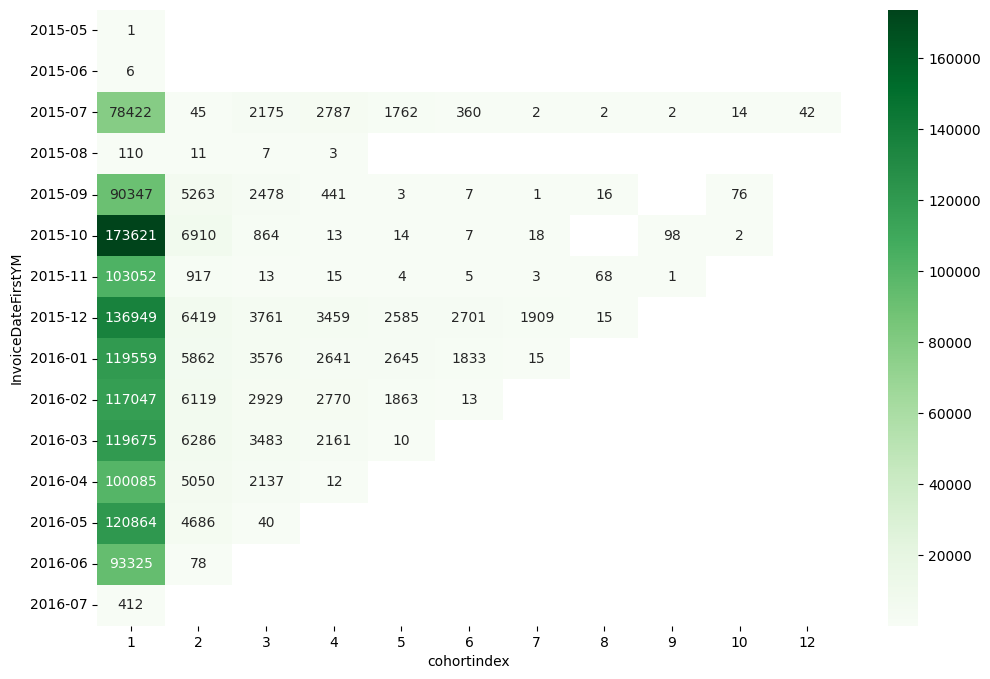

In [8]:
import matplotlib.pyplot as plt
df['InvoiceDateFirst'] = df.groupby(['cust_id'])['order_date'].transform('min')
df['order_date'] = pd.to_datetime(df['order_date'])
df['InvoiceDateFirst'] = pd.to_datetime(df['InvoiceDateFirst'])

year_diff = df['order_date'].dt.year - df['InvoiceDateFirst'].dt.year
month_diff = df['order_date'].dt.month - df['InvoiceDateFirst'].dt.month

month_diff = month_diff + (year_diff * 12)
df['cohortindex'] = month_diff + 1

df['cohortindex'].value_counts()

import seaborn as sns

df['InvoiceDateFirstYM'] = df['InvoiceDateFirst'].astype(str).str[:7]
# 잔존수
cohort_count = df.groupby(['InvoiceDateFirstYM', 'cohortindex'])['cust_id'].nunique().unstack()

plt.figure(figsize=(12, 8))
sns.heatmap(cohort_count, cmap = 'Greens', annot=True, fmt = ".0f")

**코호트 분석**
* 15년 10월 신규 고객이 매우 많았으며 이후로 100,000명대의 신규 고객 유입을 유지중이나 약간 하락세를 보임
* 구매 첫 달 이후 고객 유지율이 급격하게 감소함
***떨어진 고객 충성도 회복을 위해 신규 유입된 고객을 유지하기 위한 전략이 필요함**
* 15년 9월 유입 고객 중 76명의 고객이 유지되며 장기적인 충성 고객으로 전환되었으나 대부분 시간이 지나며 유지 고객이 매우 낮아짐
* 15년 8월 이후 고객 충성도 급격히 하락함
________________________

#### Q1. 왜 충성도가 하락하였나?

> A1. 15년 9월 이후 진입한 신규 고객의 증가 및 고객 유지 실패가 원인으로 보임

 #### Q2. 왜 고객 유지에 실패하였는가?

> A2. 최초 구매에서 재구매로 이어지지 않음


코호트를 나누어서 재구매를 판단한거에 이어서, 고객행동을 조금더 객관적인 지표로 규칙성을 발견하기 위해서 RFM지표를 고객하나당 구하고 이 지표가 유사한 그룹끼리 군집화를 진행하여 군집별로 
리텐션, CLTV, sla조달기간 달성비율, 구매한 제품군 수 및 전체대비 비율을 확인하고 그룹별로 특성을 파악하고 고객만족도를 해결할수있는 지점을 찾아서, 그룹별 해결책을 제시하는 인사이트를 도출하기 위해 분석을 진행해보았습니다


In [9]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns


In [10]:
df['order_date'] = pd.to_datetime(df['order_date'])
snapshot_date = df['order_date'].max() + pd.Timedelta(days=1)  # 기준일은 마지막 주문 다음 날

# Recency: 마지막 구매로부터의 일수
rfm = df.groupby('cust_id').agg({
    'order_date': lambda x: (snapshot_date - x.max()).days,
    'order_id': 'count',
    'gmv': 'sum'
}).reset_index()

In [11]:
rfm.columns = ['cust_id', 'Recency', 'Frequency', 'Monetary']
rfm

,cust_id,Recency,Frequency,Monetary
0,-9223350545281059840.0,111,1,2099.0
1,-9223333073734540288.0,81,1,180.0
2,-9223295751646400512.0,147,1,395.0
3,-9223238858163860480.0,57,1,2499.0
4,-9223228748575550464.0,230,1,799.0
...,...,...,...,...
1253470,9.99981511652021E+017,327,2,1976.0
1253471,904605071348172,227,1,489.0
1253472,91585485558415,320,3,1370.0
1253473,921862207165158,237,1,1209.0


In [ ]:
rfm['order_id'].value_counts()

In [12]:
# 1. RFM 분석
# RFM 점수 계산을 위한 데이터 준비
# df['order_date'] = pd.to_datetime(df['order_date'])
# snapshot_date = df['order_date'].max() + pd.Timedelta(days=1)  # 기준일은 마지막 주문 다음 날

# # Recency: 마지막 구매로부터의 일수
# rfm = df.groupby('cust_id').agg({
#     'order_date': lambda x: (snapshot_date - x.max()).days,
#     'order_id': 'count',
#     'gmv': 'sum'
# }).reset_index()
# rfm.columns = ['cust_id', 'Recency', 'Frequency', 'Monetary']

# RFM 점수화: 각 변수별로 1-5 스케일로 나눔
rfm['R_Score'] = pd.qcut(rfm['Recency'], 5, labels=[5, 4, 3, 2, 1])
frequency_bins = [0, 1, 3, 5, 8, rfm['Frequency'].max()]  # 필요한 구간을 지정 => 급간수정논의 필요
monetary_bins = [0, 100, 500, 1000, 5000, rfm['Monetary'].max()]  # 필요한 구간을 지정 =>급간 수정논ㄴ의 피룡

rfm['F_Score'] = pd.cut(rfm['Frequency'], bins=frequency_bins, labels=[1, 2, 3, 4, 5], right=False)
rfm['M_Score'] = pd.cut(rfm['Monetary'], bins=monetary_bins, labels=[1, 2, 3, 4, 5], right=False)

# RFM Score: 각 스코어를 합산
rfm['RFM_Score'] = rfm[['R_Score', 'F_Score', 'M_Score']].sum(axis=1)


In [13]:
rfm

,cust_id,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Score
0,-9223350545281059840.0,111,1,2099.0,4,2,4,10
1,-9223333073734540288.0,81,1,180.0,5,2,2,9
2,-9223295751646400512.0,147,1,395.0,4,2,2,8
3,-9223238858163860480.0,57,1,2499.0,5,2,4,11
4,-9223228748575550464.0,230,1,799.0,2,2,3,7
...,...,...,...,...,...,...,...,...
1253470,9.99981511652021E+017,327,2,1976.0,1,2,4,7
1253471,904605071348172,227,1,489.0,2,2,2,6
1253472,91585485558415,320,3,1370.0,1,3,4,8
1253473,921862207165158,237,1,1209.0,2,2,4,8


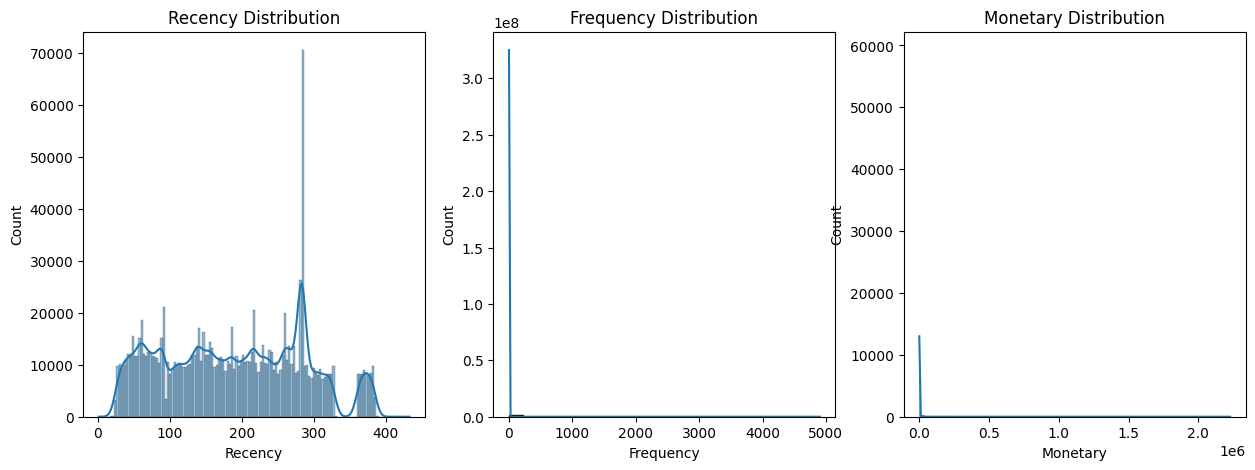

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import seaborn as sns

# Assuming RFM data is stored in 'rfm' dataframe with 'Recency', 'Frequency', 'Monetary' columns

# Visualize distributions of Recency, Frequency, and Monetary
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.histplot(rfm['Recency'], kde=True)
plt.title('Recency Distribution')

plt.subplot(1, 3, 2)
sns.histplot(rfm['Frequency'], kde=True)
plt.title('Frequency Distribution')

plt.subplot(1, 3, 3)
sns.histplot(rfm['Monetary'], kde=True)
plt.title('Monetary Distribution')
plt.show()


In [23]:
# 2. 군집화
# StandardScaler로 스케일링 후 K-means로 군집화
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm[['Recency', 'Frequency', 'Monetary']])
# 로그 변환 적용
# rfm['Recency'] = np.log1p(rfm['Recency'])
# rfm['Frequency'] = np.log1p(rfm['Frequency'])
# rfm['Monetary'] = np.log1p(rfm['Monetary'])

# K-means 모델 학습
kmeans = KMeans(n_clusters=5, random_state=42) # 앞서 급간수정과 클러스터 갯수수정필요
rfm['Cluster'] = kmeans.fit_predict(rfm_scaled)

# 각 군집의 RFM 평균값 확인
rfm_cluster_summary = rfm.groupby('Cluster').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': 'mean',
    'cust_id': 'count'
}).rename(columns={'cust_id': 'Customer_Count'}).reset_index()

print("RFM 군집화 요약:")
print(rfm_cluster_summary)


RFM 군집화 요약:
   Cluster   Recency  Frequency  Monetary  Customer_Count
0        0  4.105569   0.730202  6.589562          258418
1        1  5.371830   0.693225  6.063508          478812
2        2  4.779066   1.451518  8.996498           68960
3        3  5.471994   1.121226  7.369425          176400
4        4  5.293838   0.693147  8.286474          270885


### RFM 군집화를 통해 나온 클러스터별 등급
- 군집 1 bronze
- 군집 0 sliver
- 군집 3 gold
- 군집 4 platinum
- 군집 2 diamond

In [28]:
df = df.merge(rfm[['cust_id','Recency',
    'Frequency',
    'Monetary']], on='cust_id')

In [32]:
df['Cluster'].value_counts()

Cluster
1    478907
3    367001
0    282040
4    270885
2    249952
Name: count, dtype: int64

In [29]:
df

,fsn_id,order_date,Year,Month,order_id,order_item_id,gmv,units,deliverybdays,deliverycdays,...,InvoiceDateFirst,cohortindex,InvoiceDateFirstYM,Cluster,R_Score,F_Score,M_Score,Recency,Frequency,Monetary
0,ACCCX3S58G7B5F6P,2015-10-17 15:11:54,2015,10,3.419301e+15,3.419301e+15,6400.0,1,0,0,...,2015-10-17 15:11:54,1,2015-10,4,2,2,5,5.645447,0.693147,8.764210
1,ACCCX3S58G7B5F6P,2015-10-19 10:07:22,2015,10,1.420831e+15,1.420831e+15,6900.0,1,0,0,...,2015-10-19 09:37:06,1,2015-10,3,2,2,5,5.638355,1.098612,9.268232
2,ACCCX3S5AHMF55FV,2015-10-20 15:45:56,2015,10,2.421913e+15,2.421913e+15,1990.0,1,0,0,...,2015-10-20 15:45:56,1,2015-10,4,2,2,4,5.634790,0.693147,7.596392
3,ACCCX3S5AHMF55FV,2015-10-14 12:05:15,2015,10,4.416592e+15,4.416592e+15,1690.0,1,0,0,...,2015-10-14 12:02:09,1,2015-10,3,1,2,4,5.655992,1.098612,7.581210
4,ACCCX3S5AHMF55FV,2015-10-17 21:25:03,2015,10,4.419525e+15,4.419525e+15,1618.0,1,0,0,...,2015-10-17 21:25:03,1,2015-10,4,2,2,4,5.645447,0.693147,7.389564
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1648780,VPLEYAP3ZYYUVESU,2015-09-27 19:20:31,2015,9,4.402170e+15,4.402170e+15,2200.0,1,0,0,...,2015-09-27 19:20:31,1,2015-09,3,1,2,4,5.713733,1.098612,8.389587
1648781,VPLEYAP3ZYYUVESU,2015-09-28 01:32:58,2015,9,1.402393e+15,1.402393e+15,2098.0,1,0,0,...,2015-09-28 01:32:58,1,2015-09,3,1,2,4,5.710427,1.098612,8.342125
1648782,VPLEYAP3ZYYUVESU,2015-09-29 07:07:57,2015,9,4.403460e+15,4.403460e+15,2098.0,1,0,0,...,2015-09-29 07:07:57,1,2015-09,3,1,2,4,5.707110,1.098612,8.342125
1648783,VPLEYAP3ZYYUVESU,2015-09-29 18:15:45,2015,9,4.403860e+15,4.403860e+15,2200.0,1,0,0,...,2015-09-29 18:15:45,1,2015-09,3,1,2,4,5.707110,1.098612,8.389587



군집별 주요 변수 요약:
   Cluster   Total_Spent  Average_Order_Value  Retention_Rate          CLV
0        0  3.479172e+08          1233.573878       14.595841   324.998365
1        1  2.462847e+08           514.264150        9.090954   216.129805
2        2  1.145655e+09          4583.500619       15.814010  1085.671435
3        3  4.639798e+08          1264.246576       11.154807   416.628927
4        4  1.841944e+09          6799.726062        9.090909  1616.416900


<Figure size 1400x800 with 0 Axes>

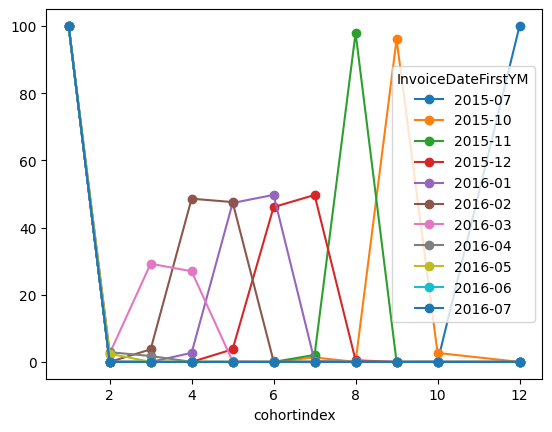

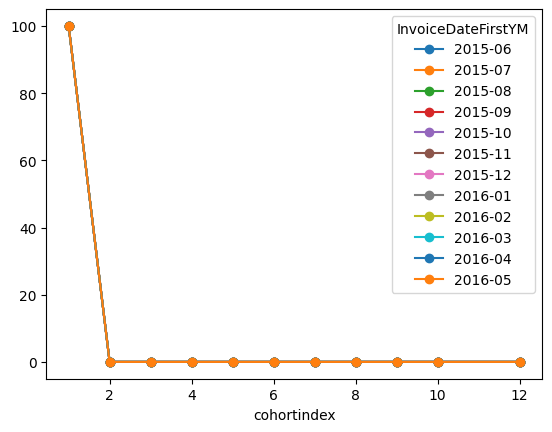

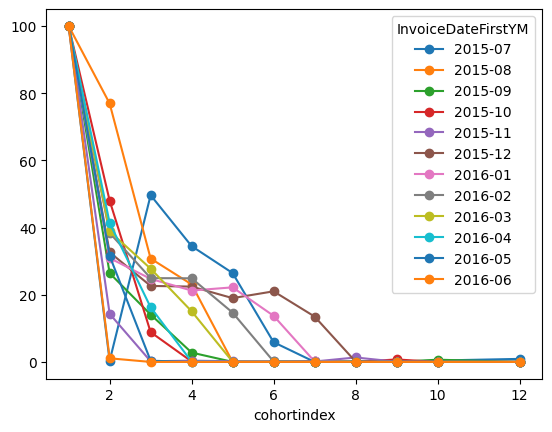

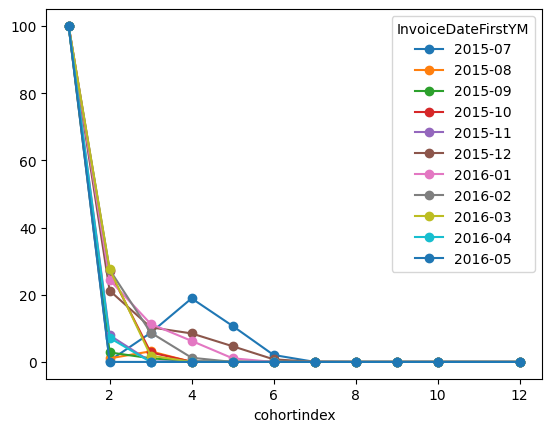

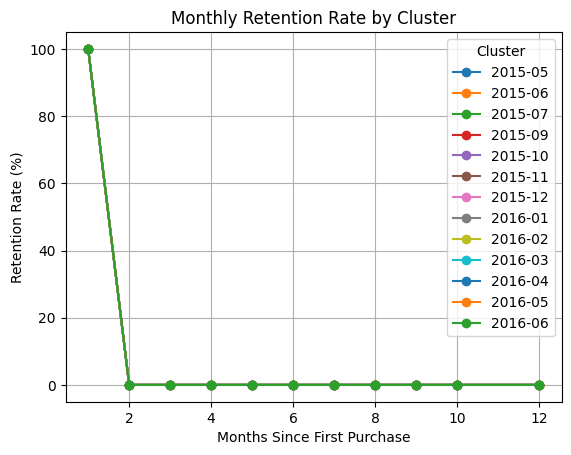

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# CLV 분석을 위한 데이터 병합



# 군집별 주요 변수 계산
cluster_metrics = df.groupby('Cluster').agg({
    'gmv': 'sum',
    'order_id': 'count'
}).rename(columns={'gmv': 'Total_Spent', 'order_id': 'Total_Orders'}).reset_index()

# 평균 주문 가치와 구매 빈도 계산
cluster_metrics['Average_Order_Value'] = cluster_metrics['Total_Spent'] / cluster_metrics['Total_Orders']
cluster_metrics['Purchase_Frequency'] = cluster_metrics['Total_Orders'] / df['cust_id'].nunique()

# 군집별 리텐션 계산
df['InvoiceDateFirstYM'] = df['InvoiceDateFirst'].astype(str).str[:7]
cohort_count = df.groupby(['Cluster', 'InvoiceDateFirstYM', 'cohortindex'])['cust_id'].nunique().unstack().fillna(0)

# 각 군집별 첫 구매 월 고객 수 기준으로 리텐션 비율 계산
retention_rates = {}
for cluster in cohort_count.index.get_level_values(0).unique():
    cluster_data = cohort_count.xs(cluster, level='Cluster')
    retention_rate = cluster_data.divide(cluster_data.iloc[:, 0], axis=0) * 100
    retention_rates[cluster] = retention_rate.mean(axis=1).mean()  # 평균 리텐션 비율 계산

# 리텐션 비율을 cluster_metrics에 추가
cluster_metrics['Retention_Rate'] = cluster_metrics['Cluster'].map(retention_rates)

# CLV 계산 (Retention Rate 기반)
cluster_metrics['Churn_Rate'] = 1 - cluster_metrics['Retention_Rate'] / 100
cluster_metrics['CLV'] = (cluster_metrics['Average_Order_Value'] * cluster_metrics['Purchase_Frequency']) / cluster_metrics['Churn_Rate']

# 결과 출력
print("\n군집별 주요 변수 요약:")
print(cluster_metrics[['Cluster', 'Total_Spent', 'Average_Order_Value', 'Retention_Rate', 'CLV']])

# 리텐션 비율 시각화(각 군집별 월별 리텐션 비율)
plt.figure(figsize=(14, 8))
for cluster in retention_rates.keys():
    retention_rate = cohort_count.xs(cluster, level='Cluster').divide(cohort_count.xs(cluster, level='Cluster').iloc[:, 0], axis=0) * 100
    retention_rate.T.plot(marker='o', label=f'Cluster {cluster}')

plt.title('Monthly Retention Rate by Cluster')
plt.xlabel('Months Since First Purchase')
plt.ylabel('Retention Rate (%)')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()




In [34]:
cluster_metrics

,Cluster,Total_Spent,Total_Orders,Average_Order_Value,Purchase_Frequency,Retention_Rate,Churn_Rate,CLV
0,0,3.479172e+08,282040,1233.573878,0.225006,14.595841,0.854042,324.998365
1,1,2.462847e+08,478907,514.264150,0.382063,9.090954,0.909090,216.129805
2,2,1.145655e+09,249952,4583.500619,0.199407,15.814010,0.841860,1085.671435
3,3,4.639798e+08,367001,1264.246576,0.292787,11.154807,0.888452,416.628927
4,4,1.841944e+09,270885,6799.726062,0.216107,9.090909,0.909091,1616.416900


In [ ]:
df = df.merge(cluster_metrics[['Cluster','Retention_Rate',
    'CLV',
    'Average_Order_Value']], on='Cluster')

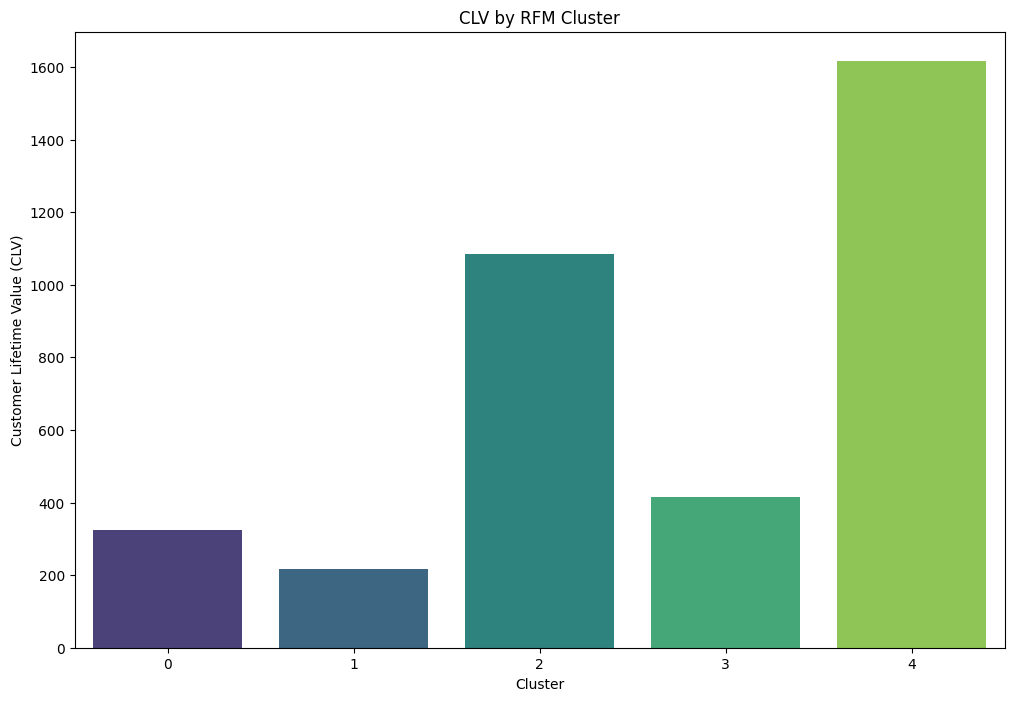

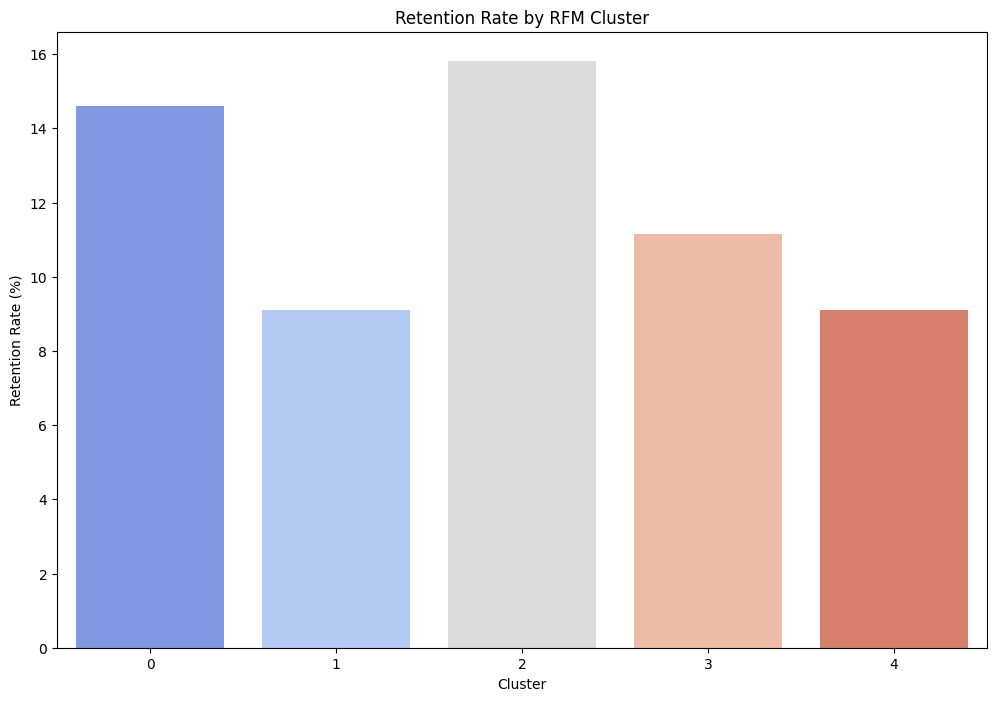

In [33]:





# 4. 시각화
# 각 군집의 RFM 특성 시각화(군집별 total CLV평균, 리텐션 평균)
plt.figure(figsize=(12, 8))
sns.barplot(x='Cluster', y='CLV', data=cluster_metrics, palette='viridis')
plt.title('CLV by RFM Cluster')
plt.xlabel('Cluster')
plt.ylabel('Customer Lifetime Value (CLV)')
plt.show()

plt.figure(figsize=(12, 8))
sns.barplot(x='Cluster', y='Retention_Rate', data=cluster_metrics, palette='coolwarm')
plt.title('Retention Rate by RFM Cluster')
plt.xlabel('Cluster')
plt.ylabel('Retention Rate (%)')
plt.show()


군집별 카테고리별 특성 요약:
    Cluster product_analytic_category  Order_Ratio  Revenue_Ratio
0         0                    Camera     0.017749       0.193036
1         0           CameraAccessory     0.182641       0.094019
2         0        EntertainmentSmall     0.581059       0.525113
3         0                 GameCDDVD     0.062200       0.071724
4         0            GamingHardware     0.156350       0.116108
5         1                    Camera     0.001013       0.001316
6         1           CameraAccessory     0.177059       0.156119
7         1        EntertainmentSmall     0.625336       0.655095
8         1                 GameCDDVD     0.024717       0.032840
9         1            GamingHardware     0.171875       0.154629
10        2                    Camera     0.109053       0.504234
11        2           CameraAccessory     0.175506       0.082364
12        2        EntertainmentSmall     0.408598       0.171169
13        2                 GameCDDVD     0.168192       0.

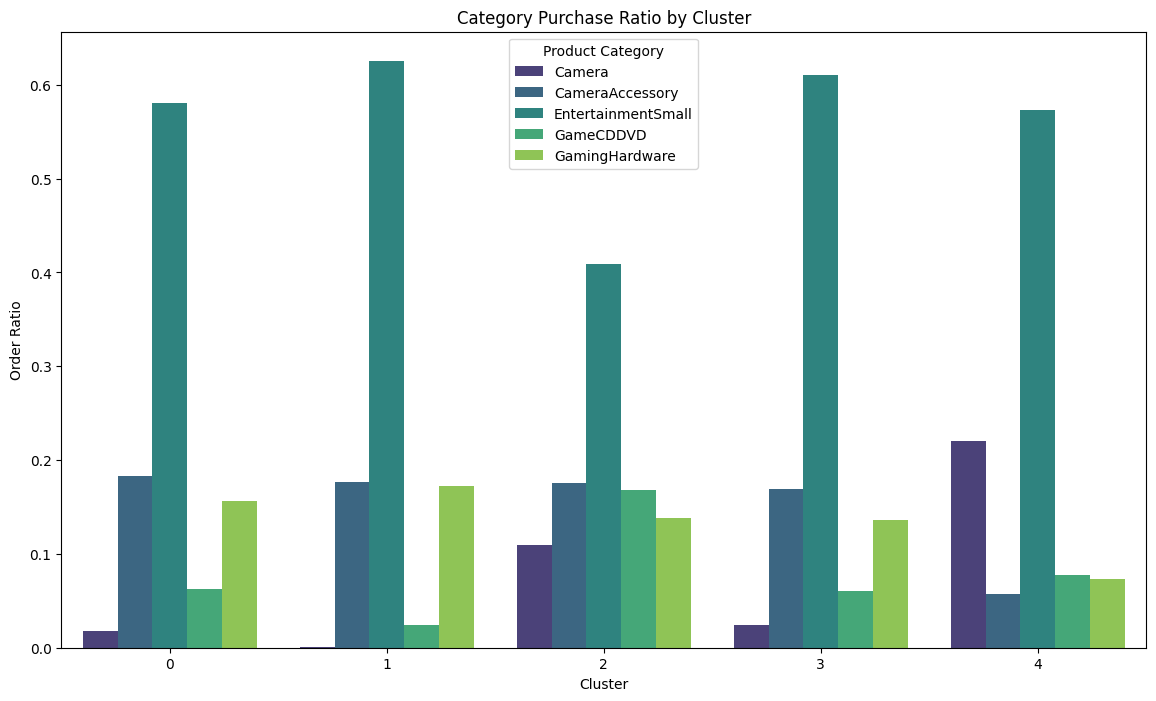

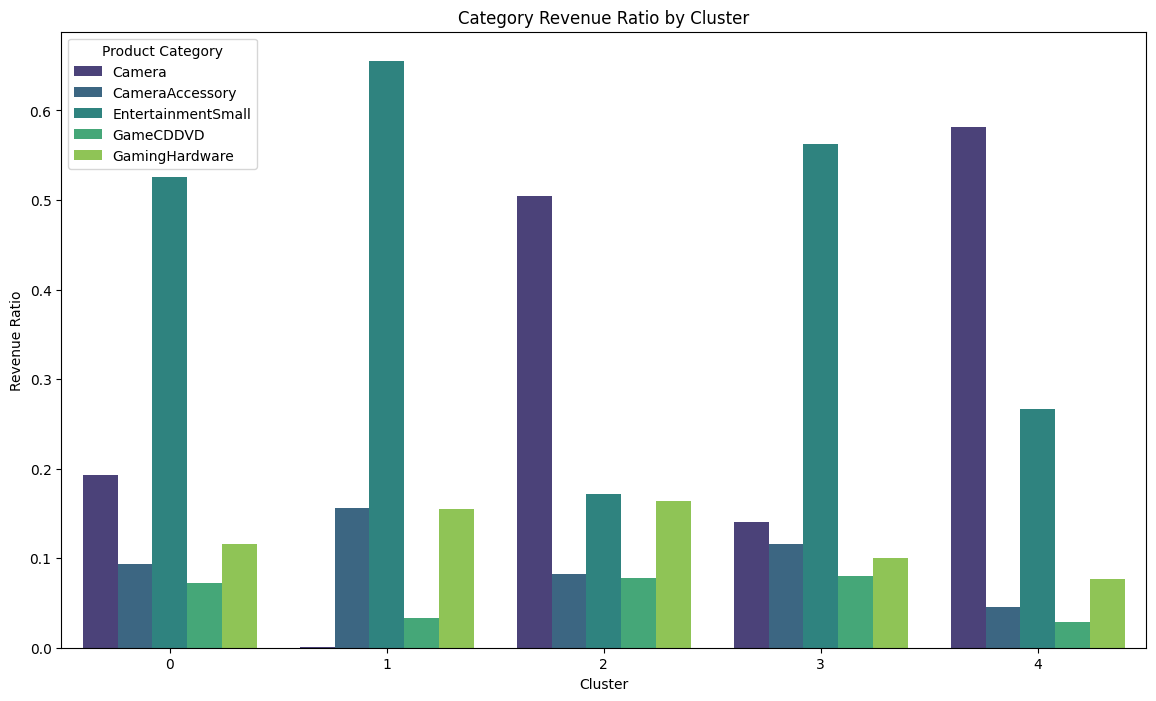

In [35]:
# 군집별 고객의 주요 카테고리 특성 파악
# 군집과 카테고리별로 구매 횟수 및 총 매출을 집계하여 비율을 계산

# 각 군집 내에서 카테고리별 구매 횟수와 매출 합계를 계산
cluster_category_summary = df.groupby(['Cluster', 'product_analytic_category']).agg({
    'order_id': 'count',       # 구매 횟수
    'gmv': 'sum'               # 매출 합계
}).rename(columns={'order_id': 'Total_Orders', 'gmv': 'Total_Revenue'}).reset_index()

# 각 군집별 전체 구매 횟수와 매출 계산
cluster_totals = cluster_category_summary.groupby('Cluster').agg({
    'Total_Orders': 'sum',
    'Total_Revenue': 'sum'
}).rename(columns={'Total_Orders': 'Cluster_Total_Orders', 'Total_Revenue': 'Cluster_Total_Revenue'}).reset_index()

# 각 카테고리의 비율을 계산하여 군집 내 차지하는 비율로 변환
cluster_category_summary = cluster_category_summary.merge(cluster_totals, on='Cluster')
cluster_category_summary['Order_Ratio'] = cluster_category_summary['Total_Orders'] / cluster_category_summary['Cluster_Total_Orders']
cluster_category_summary['Revenue_Ratio'] = cluster_category_summary['Total_Revenue'] / cluster_category_summary['Cluster_Total_Revenue']

print("군집별 카테고리별 특성 요약:")
print(cluster_category_summary[['Cluster', 'product_analytic_category', 'Order_Ratio', 'Revenue_Ratio']])

# 카테고리별 비율 시각화
plt.figure(figsize=(14, 8))
sns.barplot(data=cluster_category_summary, x='Cluster', y='Order_Ratio', hue='product_analytic_category', palette='viridis')
plt.title('Category Purchase Ratio by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Order Ratio')
plt.legend(title='Product Category')
plt.show()

plt.figure(figsize=(14, 8))
sns.barplot(data=cluster_category_summary, x='Cluster', y='Revenue_Ratio', hue='product_analytic_category', palette='viridis')
plt.title('Category Revenue Ratio by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Revenue Ratio')
plt.legend(title='Product Category')
plt.show()


군집별 SLA 준수 비율:
   Cluster  SLA_Compliance_Rate
0        0            83.057013
1        1            99.458976
2        2            94.797401
3        3            99.033245
4        4            97.711944


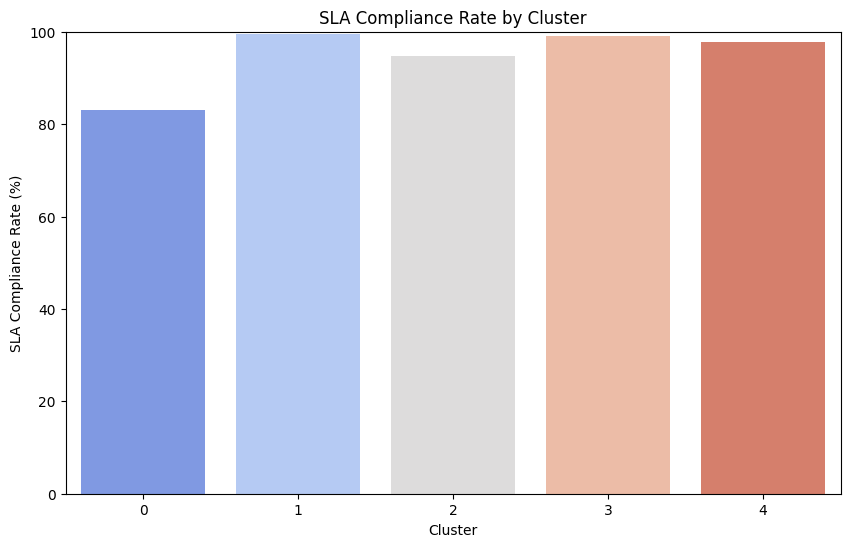

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

# SLA를 지킨 여부를 계산하는 열 생성 ('1'이면 SLA 준수, '0'이면 SLA 초과)
df['SLA_Met'] = df['deliverybdays'] <= df['sla']

# 군집별 SLA 준수 비율 계산
sla_compliance = df.groupby('Cluster').agg({
    'SLA_Met': 'mean'  # SLA 준수 비율 계산
}).reset_index()

# SLA 준수 비율을 백분율로 변환
sla_compliance['SLA_Compliance_Rate'] = sla_compliance['SLA_Met'] * 100

# 결과 출력
print("군집별 SLA 준수 비율:")
print(sla_compliance[['Cluster', 'SLA_Compliance_Rate']])

# SLA 준수 비율 시각화
plt.figure(figsize=(10, 6))
sns.barplot(data=sla_compliance, x='Cluster', y='SLA_Compliance_Rate', palette='coolwarm')
plt.title('SLA Compliance Rate by Cluster')
plt.xlabel('Cluster')
plt.ylabel('SLA Compliance Rate (%)')
plt.ylim(0, 100)  # 비율이므로 0에서 100 사이로 설정
plt.show()


cluster_delivery_analysis = df.groupby('Cluster').agg({
    'deliverybdays': ['mean', 'std'],  # 평균 배송일과 표준편차
    'deliverycdays': ['mean', 'std']   # 평균 달력 일과 표준편차
})
print("클러스터별 배송 시간 분석 (영업일 및 달력 일):")
print(cluster_delivery_analysis)

In [37]:
cluster_delivery_analysis = df.groupby('Cluster').agg({
    'deliverybdays': ['mean', 'std'],  # 평균 배송일과 표준편차
    'deliverycdays': ['mean', 'std']   # 평균 달력 일과 표준편차
})
print("클러스터별 배송 시간 분석 (영업일 및 달력 일):")
print(cluster_delivery_analysis)

클러스터별 배송 시간 분석 (영업일 및 달력 일):
        deliverybdays           deliverycdays          
                 mean       std          mean       std
Cluster                                                
0            3.650372  2.672557      4.253336  3.103463
1            0.119004  0.877834      0.138071  1.020442
2            1.070013  3.249970      1.246275  3.789563
3            0.242999  1.397068      0.282571  1.626097
4            0.353183  1.802994      0.410957  2.100785


In [40]:
# 클러스터별 프로모션 반응 분석
promotion_analysis = df.groupby(['Cluster', 'promotion']).agg(
    Total_Orders=('order_id', 'count'),
    Total_GMV=('gmv', 'sum')
).reset_index()

# 프로모션 및 비프로모션 반응을 비교할 수 있도록 데이터 피벗
promotion_analysis = promotion_analysis.pivot(index='Cluster', columns='promotion', values=['Total_Orders', 'Total_GMV'])
promotion_analysis.columns = ['_'.join(col).strip() for col in promotion_analysis.columns.values]

# 프로모션 대비 비프로모션 주문 비율과 GMV 비율 계산
promotion_analysis['Order_Ratio'] = promotion_analysis['Total_Orders_Y'] / promotion_analysis['Total_Orders_N']
promotion_analysis['GMV_Ratio'] = promotion_analysis['Total_GMV_Y'] / promotion_analysis['Total_GMV_N']

# 결과 출력
print("\n클러스터별 프로모션 반응 분석:")
print(promotion_analysis)


클러스터별 프로모션 반응 분석:
         Total_Orders_N  Total_Orders_Y   Total_GMV_N   Total_GMV_Y  \
Cluster                                                               
0              268756.0         13284.0  3.326904e+08  1.522681e+07   
1              389179.0         89728.0  1.967555e+08  4.952918e+07   
2              222620.0         27332.0  9.769886e+08  1.686665e+08   
3              330698.0         36303.0  4.149241e+08  4.905568e+07   
4              215418.0         55467.0  1.419974e+09  4.219694e+08   

         Order_Ratio  GMV_Ratio  
Cluster                          
0           0.049428   0.045769  
1           0.230557   0.251730  
2           0.122774   0.172639  
3           0.109777   0.118228  
4           0.257485   0.297167  


### 군집별 gmv , retantion_rate 에 연관을주는 변수 분석 => 회귀분석으로

## 2. 제품 재구매 분석

In [ ]:
df['order_date'] = pd.to_datetime(df['order_date'])
df = df.sort_values(by='order_date')

first_order = df.groupby('cust_id')['order_date'].min().reset_index()
first_order.columns = ['cust_id', 'first_order_date']

df = df.merge(first_order, on='cust_id', how='left')

customer_counts = df.groupby('cust_id')['order_id'].count().reset_index()
customer_counts.columns = ['cust_id', 'order_count']

repeat_customers = customer_counts[customer_counts['order_count'] > 1]

total_customers = customer_counts['cust_id'].nunique()
repeat_customers_count = repeat_customers['cust_id'].nunique()
repeat_customers_ratio = repeat_customers_count / total_customers * 100

print(f"재주문 비율: {repeat_customers_ratio:.2f}%")

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 필요한 열을 준비

df['order_date'] = pd.to_datetime(df['order_date'])
df['cohort_month'] = df['order_date'].dt.to_period('M')  # 코호트 생성 (첫 구매 월 기준)

# 각 고객의 첫 구매 기준으로 월 차이 계산
df['cohort_index'] = (df['order_date'].dt.to_period('M') - df.groupby('cust_id')['order_date'].transform('min').dt.to_period('M')).apply(lambda x: x.n)

# 코호트별, 코호트 인덱스별로 고객 수 계산
cohort_counts = df.groupby(['cohort_month', 'cohort_index'])['cust_id'].nunique().unstack().fillna(0)

# 각 코호트의 첫 달 고객 수 대비 리텐션 비율 계산
cohort_sizes = cohort_counts.iloc[:, 0]
retention_matrix = cohort_counts.divide(cohort_sizes, axis=0) * 100

# 리텐션 매트릭스 시각화
plt.figure(figsize=(12, 8))
sns.heatmap(retention_matrix, annot=True, fmt=".0f", cmap="YlGnBu")
plt.title('월별 리텐션 비율')
plt.ylabel('코호트 월')
plt.xlabel('첫 구매 이후 경과 월')
plt.show()


In [ ]:
order_counts = df.groupby('cust_id')['order_id'].nunique()

one_time_customers = order_counts[order_counts == 1].index
repeat_customers = order_counts[order_counts > 1].index

one_time_purchases = df[df['cust_id'].isin(one_time_customers)].groupby('product_analytic_sub_category')['units'].sum()
repeat_purchases = df[df['cust_id'].isin(repeat_customers)].groupby('product_analytic_sub_category')['units'].sum()

def func(pct, allvalues):
    if pct >= 4:
        absolute = int(pct / 100. * sum(allvalues))
        return f"{pct:.1f}%\n({absolute})"
    return ''

fig, ax = plt.subplots(1, 2, figsize=(14, 7))

# 1회 구매 고객 원그래프
ax[0].pie(one_time_purchases, labels=one_time_purchases.index, 
           autopct=lambda pct: func(pct, one_time_purchases), startangle=140)
ax[0].set_title('one_time_purchases_product')

# 재구매 고객 원그래프
ax[1].pie(repeat_purchases, labels=repeat_purchases.index, 
           autopct=lambda pct: func(pct, repeat_purchases), startangle=140)
ax[1].set_title('repeat_purchases_product')

plt.show()

* 1회 구매 고객과 재구매 고객이 구입한 제품 하위카테고리에서 거의 비슷한 비율을 보임
* Game의 경우 1회 구매 고객이 구입한 상품 중 5%를 차지하는데 재구매 고객이 구입한 상품 중에서는 12.1%를 차지함
* 하위 카테고리가 Game인 상품의 재구매가 많음

In [ ]:
df['order_date'] = pd.to_datetime(df['order_date'])

first_purchase = df.loc[df.groupby('cust_id')['order_date'].idxmin()].reset_index(drop=True)
order_counts = df.groupby('cust_id')['order_id'].nunique()
repeat_customers = order_counts[order_counts > 1].index

first_purchase['repeat_customer'] = first_purchase['cust_id'].isin(repeat_customers)

repurchase_rates = first_purchase.groupby('product_analytic_vertical').agg(
    total_customers=('cust_id', 'count'),
    repeat_customers=('repeat_customer', 'sum')
)

repurchase_rates['repurchase_rate'] = (repurchase_rates['repeat_customers'] / repurchase_rates['total_customers']) * 100

# 재구매율이 높은 상위 15개 product_analytic_vertical
top_10_repurchase_rates = repurchase_rates.sort_values(by='repurchase_rate', ascending=False).head(15)

print("재구매율 상위 15개 product_analytic_vertical:")
top_10_repurchase_rates[['repurchase_rate', 'total_customers', 'repeat_customers']]

* 구매자체가 매우 적은 제품을 제외하고 GamingChargingStation / GamingConsole / GamingAccessoryKit / Filter                        / ExtensionTube / Instant Cameras / CameraBatteryGrip / GameValueCards / PhysicalGame 제품의 재구매율이 전체재구매율(21.46%)보다 높음
* GamingConsole / GamingAccessoryKit / Filter / Instant Cameras / PhysicalGame 제품의 재구매율과 재구매 건수가 유의미하게 높음
> 해당 제품 위주의 재주문 유도 전략

* 총 74개의 제품 중 13개만(실질적으로 8개) 전체 재구매율보다 높은 재구매율을 보이고 있음
* 61개의 제품은 전체재구매율(21.46%)보다 낮은 재구매율을 보임
> 소수의 제품군에만 재구매가 집중되고 있으며 고객의 다양한 니즈를 충족시키지 못하고 있음
________________________
**Q3. 왜 재구매로 이어지지 않았는가?**
> 특정 제품(주로 게임 관련)에서만 높은 재구매율을 보임. 

> 소수의 제품 외 대부분의 제품이 재구매율이 낮음. 

> 제품 구매 경험 과정상 만족도가 낮기 때문임.

## 3. 제품 구매 과정 만족도 - 배송 분석

In [ ]:
df['order_date'] = pd.to_datetime(df['order_date'])

first_purchase = df.loc[df.groupby('cust_id')['order_date'].idxmin()].reset_index(drop=True)
order_counts = df.groupby('cust_id')['order_id'].nunique()
repeat_customers = order_counts[order_counts > 1].index

first_purchase['repeat_customer'] = first_purchase['cust_id'].isin(repeat_customers)

repurchase_rates = first_purchase.groupby('product_analytic_category').agg(
    total_customers=('cust_id', 'count'),
    repeat_customers=('repeat_customer', 'sum')
)

repurchase_rates['repurchase_rate'] = (repurchase_rates['repeat_customers'] / repurchase_rates['total_customers']) * 100

top_10_repurchase_rates = repurchase_rates.sort_values(by='repurchase_rate', ascending=False).head()

print("상품 카테고리별 재구매율:")
top_10_repurchase_rates[['repurchase_rate', 'total_customers', 'repeat_customers']]

In [ ]:
average_delivery_days = df.groupby('product_analytic_category')['sla'].mean().reset_index()

# 결과 출력
average_delivery_days.columns = ['product_analytic_category', 'average_sla']
average_delivery_days = average_delivery_days.sort_values(by='average_sla', ascending=False).head()
average_delivery_days

* 재주문 비율이 낮은 3개 카테고리 CameraAccessory / GamingHardware / EntertainmentSmall 의 sla (제품 배달에 걸리는 일 수)가 5일 이상으로 길다.

_____________________
**Q4. 왜 제품 구매 경험 만족도가 낮은가?**
> A4. 재구매율이 낮은 제품의 경우 평균 배송기간(sla)이 길기 때문에 만족도가 낮다.

In [ ]:
numeric_columns = ['deliverybdays', 'deliverycdays', 'pincode', 'product_mrp', 'product_procurement_sla']
for col in numeric_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce') 
    
average_metrics = df.groupby('product_analytic_category').agg({
    'units': 'mean',
    'deliverybdays': 'mean',
    'deliverycdays': 'mean',
    'pincode': 'mean',
    'product_mrp': 'mean',
    'product_procurement_sla': 'mean'
}).reset_index()

average_metrics.columns = ['Product Category', 'Average Units', 'Average Delivery B days', 'Average Delivery C Days', 'Average Pincode', 'Average Product MRP', 'Average Procurement SLA']
average_metrics = average_metrics.sort_values(by='Average Procurement SLA', ascending=False).head()
average_metrics

* 제품 sla(평균 배달 일수)가 낮을수록 Average Procurement SLA(평균 조달일)는 긴 추세를 보임
* 조달기간이 긴 제품은 물류 관리가 체계적이고 공급업체와 관계가 잘 구축되어 재고관리를 효율적으로 운영하는 것으로 보임
* 반면 조달기간이 짧은 제품의 배송일이 오히려 길었던 점에서 갑작스러운 수요 증가나 공급망 문제가 발생했을 가능성이 있음

In [ ]:
df['order_date'] = pd.to_datetime(df['order_date'])

camera_accessory_data = df[df['product_analytic_category'] == 'CameraAccessory']

camera_accessory_data['month'] = camera_accessory_data['order_date'].dt.to_period('M')
monthly_sla_camera_accessory = camera_accessory_data.groupby('month')['sla'].mean().reset_index()

monthly_sales_camera_accessory = camera_accessory_data.groupby('month')['units'].sum().reset_index()

fig, ax1 = plt.subplots(figsize=(12, 6))

# SLA 라인 그래프 (파랑)
ax1.set_xlabel('Month')
ax1.set_ylabel('Average SLA', color='blue')
ax1.plot(monthly_sla_camera_accessory['month'].astype(str), monthly_sla_camera_accessory['sla'], marker='o', color='blue', label='Average SLA')
ax1.tick_params(axis='y', labelcolor='blue')

# 판매량 라인 그래프 (오렌지)
ax2 = ax1.twinx()
ax2.set_ylabel('Total Units Sold', color='orange')
ax2.plot(monthly_sales_camera_accessory['month'].astype(str), monthly_sales_camera_accessory['units'], marker='o', color='orange', label='Total Units Sold')
ax2.tick_params(axis='y', labelcolor='orange')

plt.title('Monthly Average SLA and Sales for CameraAccessory Products')
plt.xticks(rotation=45)
fig.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


* sla가 가장 길었던 제품 카테고리 CameraAccessory 의 월별 sla와 판매량 추이
* 2015년 8월 이후로 sla와 판매량의 증감방향이 대부분 반대임
* 15년 11월부터 16년 5월까지 판매 증감폭이 크지 않은 기간에는 평균 sla이 감소추세를 보임 / 그 외 기간에는 sla이 높고 변동 폭이 큼

> 꾸준한 판매량 유지와 정확한 수요 예측을 통해 sla을 꾸준히 낮추어야 함.

______________________
**Q5. 왜 제품 배송기간(sla)이 긴가?**
> A5. 판매량 변동이 클수록 수요 예측에 실패하여 제품 공급에 어려움을 겪고 배송일이 길어짐.

In [ ]:
df['order_date'] = pd.to_datetime(df['order_date'])

camera_accessory_data = df[df['product_analytic_category'] == 'CameraAccessory']

total_sales_per_product = camera_accessory_data.groupby('product_analytic_vertical')['units'].sum().reset_index()
total_sales_per_product.columns = ['product_analytic_vertical', 'total_sales']

camera_accessory_data['month'] = camera_accessory_data['order_date'].dt.to_period('M')
monthly_sales = camera_accessory_data.groupby(['product_analytic_vertical', 'month'])['units'].sum().reset_index()

monthly_variability = monthly_sales.groupby('product_analytic_vertical')['units'].std().reset_index()
monthly_variability.columns = ['product_analytic_vertical', 'monthly_variability']

result = total_sales_per_product.merge(monthly_variability, on='product_analytic_vertical')
result = result.sort_values(by='monthly_variability', ascending=False).head(10)
result

* 월별 판매량 변화가 매우 큰(표준편차1,000 이상) 제품 Flash / CameraTripod / CameraBattery / Len 을 중심으로 제품 수요예측 프로세스를 개선할 것을 제안할 수 있음

## 4. 프로모션 분석

In [ ]:
df1.head(10)

In [ ]:
data= {
    '15.07': {
        'days': "18-19",
        'duration': "2days",
        'frequency': "once"
    },
    '15.08': {
        'days': "15-17,28-30",
        'duration': "6days",
        'frequency': "twice"
    },
    '15.09': {
        'days': "N",
        'duration': "N",
        'frequency': "N"
    },
    '15.10': {
        'days': "15-17",
        'duration': "3days",
        'frequency': "once"
    },
    '15.11': {
        'days': "7-14",
        'duration': "7days",
        'frequency': "once"
    },
    '15.12': {
        'days': "25-31",
        'duration': "6days",
        'frequency': "once"
    },
    '16.01': {
        'days': "1-3,20-22",
        'duration': "6days",
        'frequency': "twice"
    },
    '16.02': {
        'days': "1-2,14-15,20-21",
        'duration': "6days",
        'frequency': "three times"
    },
    '16.03': {
        'days': "7-9",
        'duration': "3days",
        'frequency': "once"
    },
    '16.04': {
        'days': "N",
        'duration': "N",
        'frequency': "N"
    },
    '16.05': {
        'days': "25-27",
        'duration': "3days",
        'frequency': "once"
    },
    '16.06': {
        'days': "N",
        'duration': "N",
        'frequency': "N"
    }
}

df5 = pd.DataFrame(data)
df5.head()

In [ ]:
#df3.set_index('index', inplace=True)
df3_transposed = df3.T

plt.subplots(figsize=(12, 6))

# NPS(고객충성도) - 파랑
plt.plot(df3_transposed.index, df3_transposed['NPS'], marker='o', label='NPS', color='blue')
plt.tick_params(axis='y', labelcolor='blue')
plt.grid()
plt.legend(loc='upper left')
plt.title('Monthly Trends of NPS ')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

* 프로모션 횟수가 2회 이상인 달(15년 8월, 16년 1월,2월)과 가장 프로모션이 길었던 달(15년 11월)에 NPS가 증가함
* 반복적인 프로모션이 고객 만족도 향상 측면에서 긍정적인 효과 보임

In [ ]:
discount_periods = [
    ('2015-07-18', '2015-07-19'),
    ('2015-08-15', '2015-08-17'),
    ('2015-08-28', '2015-08-30'),
    ('2015-10-15', '2015-10-17'),
    ('2015-11-07', '2015-11-14'),
    ('2015-12-25', '2016-01-03'),
    ('2016-01-20', '2016-01-22'),
    ('2016-02-01', '2016-02-02'),
    ('2016-02-20', '2016-02-21'),
    ('2016-02-14', '2016-02-15'),
    ('2016-03-07', '2016-03-09'),
    ('2016-05-25', '2016-05-27')
]

sales_data = []

for start_date, end_date in discount_periods:
    mask = (df['order_date'] >= start_date) & (df['order_date'] <= end_date)
    total_units = df.loc[mask, 'units'].sum() 
    sales_data.append({'start_date': start_date, 'end_date': end_date, 'total_units': total_units})

sales_df = pd.DataFrame(sales_data)
print(sales_df)

In [ ]:
category_results = []

for start_date, end_date in discount_periods:
    filtered_data = df[(df['order_date'] >= start_date) & (df['order_date'] <= end_date)]
    
    # 카테고리별 판매량
    category_sales = filtered_data.groupby('product_analytic_category')['units'].sum().reset_index()
    category_sales = category_sales.sort_values(by='units', ascending=False)
    
    # 인기 상품
    top_products = filtered_data.groupby('product_analytic_vertical')['units'].sum().reset_index()
    top_products = top_products.sort_values(by='units', ascending=False).head(10)
    top_products_list = top_products['product_analytic_vertical'].tolist()
    
    category_results.append({
        'start_date': start_date,
        'end_date': end_date,
        'top_products': top_products_list,
        'top_categories': category_sales.head(5)
    })

category_sales_df = pd.DataFrame(category_results)

for index, row in category_sales_df.iterrows():
    print(f"기간: {row['start_date']} ~ {row['end_date']}")
    print("인기 상품:", row['top_products'])
    print("상위 5개 카테고리 판매량:")
    print(row['top_categories'])
    print()

* 할인기간동안 'LaptopSpeaker', 'MobileSpeaker', 'DSLR' 같은 특정상품이 항상 인기상품에 포함되어있음
> 인기 상품을 중심으로 한 마케팅이 nps에 긍정적 영향을 줄 수 있는지 추가 분석 필요

In [ ]:
df4 #광고 및 투자 내역 (천 달러))

In [ ]:
monthly_gmv = df.groupby(['Year', 'Month'])['gmv'].sum().reset_index()
monthly_gmv['date'] = pd.to_datetime(monthly_gmv[['Year', 'Month']].assign(day=1))

monthly_total_investment = df4.groupby(['Year', 'Month'])['Total Investment'].sum().reset_index()
monthly_total_investment['date'] = pd.to_datetime(monthly_total_investment[['Year', 'Month']].assign(day=1))

fig, ax1 = plt.subplots(figsize=(12, 6))

# Total Investment 그래프
ax1.plot(monthly_total_investment['date'], monthly_total_investment['Total Investment'], marker='o', label='Total Investment', color='green')
ax1.set_xlabel('Month')
ax1.set_ylabel('Total Investment', color='green')
ax1.tick_params(axis='y', labelcolor='green')
ax1.set_title('Monthly Investment and GMV Trend')
ax1.grid()

# GMV그래프
ax2 = ax1.twinx()
ax2.plot(monthly_gmv['date'], monthly_gmv['gmv'], marker='o', label='GMV', color='orange')
ax2.set_ylabel('GMV', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


* 전제 광고 투자액과 매출액(GMV)간 양의 상관관계를 보임
* 그러나 광고 투자액과 nps 간에는 음의 상관관계를 보임 (total investment 와 nps의 증감 방향 반대)
* 광고 투자액과 nps 간 음의 상관관계 원인에 대한 추가분석 필요 (잦은 광고로 인한 피로감, 과대 광고, 광고 모델 이미지 등 불만족 원인 파악 필요)
___________
*단위:
GMV (달러) / 
광고 및 투자 내역 (천 달러)

In [ ]:
df4['date'] = pd.to_datetime(df4[['Year', 'Month']].assign(day=1))

media_columns = ['TV', 'Digital', 'Sponsorship', 'Content Marketing', 'Online marketing', ' Affiliates', 'SEM', 'Radio', 'Other']

plt.figure(figsize=(12, 6))
for media in media_columns:
    if media in df4.columns:
        plt.plot(df4['date'], df4[media], marker='o', label=media)

plt.title('Monthly Investment Trend by Media')
plt.xlabel('Month')
plt.ylabel('Total Investment')
plt.xticks(rotation=45)
plt.legend(title='Media', loc='upper left')
plt.grid()
plt.tight_layout()
plt.show()


* 전체 광고 투자액 중스폰서십 진행한 달의 경우 매출 급증
* 스폰서십 광고 효과의 경우 스폰서십과 연계된 특별 행사나 캠페인으로 인해 기업 또는 파트너사의 대량 구매가 발생할 수 있으며 일반 소비자의 수요와는 무관하게 매출이 일시적으로 상승할 수 있어 GMV가 비정상적으로 높아진 경우 일 수 도 있음

# 결론


**1. 문제상황 : 고객 충성도 하락**

**2. 분석 목적 : 고객 충성도 회복**

**3. 5Why분석**

Q1. 왜 고객 충성도가 하락하였는가?
 > A1. 신규 고객 유입은 많았으나 고객 유지에 실패하였다.
 
Q2. 왜 고객 유지에 실패하였나?
 > A2. 최초 구매에서 재구매로 연결하는데 실패했기 때문이다.
 
Q3. 왜 재구매로 이어지지 않았는가?
 > A3. 고객의 제품 구매 경험 만족도가 낮았기 때문이다.
 
Q4. 왜 구매 경험 만족도가 낮은가?
 > A4. 재구매율이 낮은 제품의 배송일(sla)이 긴 것으로 보아 긴 배송일로 인해 만족도가 떨어졌다.
 
Q5. 왜 제품 배송일이 긴가?
 > A5. 판매량 변동이 클수록 수요 예측에 실패하여 제품 공급에 어려움을 겪고 배송일도 길어진다.

**4. 제안**
* 제품 평균 배송기간(sla)이 가장 길었던 CameraAccessory 카테고리 내에서 제품 판매량 변동 폭이 큰 제품 Flash / CameraTripod / CameraBattery / Len 을 중심으로 제품 수요예측 프로세스를 개선하여 판매량 변동에 대한 대응안을 마련한다.

* GamingConsole / GamingAccessoryKit / Filter / Instant Cameras / PhysicalGame 제품의 재구매율과 재구매 건수가 유의미하게 높으므로 해당 제품군의 확대 및 재주문 유도 전략을 시행한다.

* 프로모션이 2회 이상이었던 달에 nps도 증가하는 추세를 보였다. 반복 프로모션이 고객 충성도에 긍정적 효과를 보이는 것으로 추측된다. 특히 'LaptopSpeaker', 'MobileSpeaker', 'DSLR' 상품은 프로모션 기간동안 인기상품에 포함되었다. 해당 제품을 중심으로 프로모션 전략 확대가 고객 충성도를 올릴 수 있을지 추가 분석이 필요하다.

* 광고 투자액과 nps 간에는 음의 상관관계를 보인다. 해당 원인을 위한 추가 분석이 필요하다.
